# Module 3 - The Central Limit Theorem

In this file you will find Python code examples of how to deal with the concepts from the module *The Central Limit Theorem*. More specifically:

- how to plot the **probability density function** of the **normal distribution**
- how to plot a **histogram** of a sample with the theoretical probability distribution superimposed
- how to **calculate probabilities** in the normal distribution
- how to calculate **confidence intervals**

In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## The normal distribution

### Plot of the normal distribution

The standard normal distribution $Z \sim Nor(\mu = 0, \sigma = 1)$ can be plotted as follows:

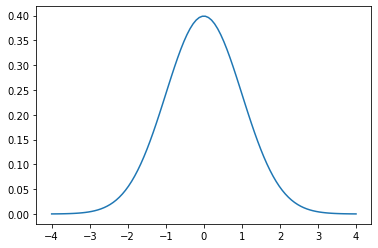

In [2]:
# Take 100 values for the X-axis, between -4 and 4, evenly spaced
x = np.linspace(-4, +4, num=100)
# Plot the probability density function (pdf) for these X-values
plt.plot(x, stats.norm.pdf(x, 0, 1))

We can generalize this code for the normal distribution. As an example we take $X \sim Nor(\mu = 5, \sigma = 1.5)$. All points of interest on the Gauss curve are located at most 4 standard deviations left or right of the mean. Consequently, that's how we're going to calculate our x-values. The `pdf()`-function allows us to specify mean and standard deviation as parameters.

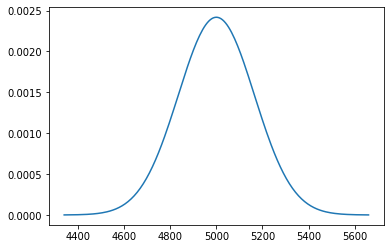

In [3]:
m = 5000    # Gemiddelde
s = 165     # Standaardafwijking
x = np.linspace(m - 4 * s, m + 4 * s, num=201)
plt.plot(x, stats.norm.pdf(x, m, s))

The *shape* of this graph is identical to the one of the *standard* normal distribution, only the scale (both on the x- and y-axis) differs.

### Histogram with theoretical probability density

The next example shows how to plot a histogram of normally distributed data, with the theoretical probability density function superimposed as a line graph.

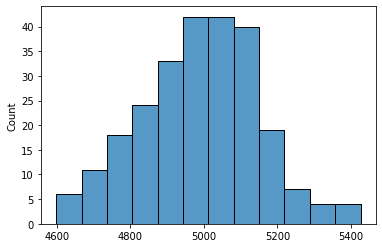

In [4]:
# Generate 10000 random numbers, following a normal distribution
n = 250
observations = np.random.normal(loc=m, scale=s, size=n)

# Plot histogram, without probability density
obs_hist = sns.histplot(observations)

If you plot a Gauss curve on the histogram above, you won't see much (try this for yourself!). After all, the scale on the y-axis for the Gauss curve is much smaller than that of the histogram (see the plot of a normal distribution above). The maximum value of a density function is always a number between 0 and 1 (since the area under the curve must be equal to 1), while a histogram counts how many times each observation occurs and consequently is usually larger than 1.

The solution is to draw a histogram showing *densities*. In this case, the *area* of a member is equal to the *relative* frequency of that class. (The *density* or *density* is the *relative* frequency divided by the *width* of the class.) The sum of all areas of all bars is one. This corresponds to the area under the Gauss curve which is also equal to one. The histogram and the Gauss curve can then use the same y-axis.

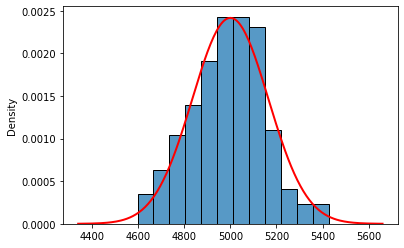

In [5]:
# histogram with observations
obs_hist = sns.histplot(observations, stat = "density")
# X-axis values
dist_x = np.linspace(m - 4 * s, m + 4 * s, num=201)
# Probability density for the X-values
dist_y = stats.norm.pdf(dist_x, m, s)

# Plot the Gayss curve superimposed on the histogram
obs_hist.plot(dist_x, dist_y, 'red', lw=2)

## Probability distribution in the normal distribution

Assume Superman has a reaction speed with a normal distribution with mean 5 ms and standard deviation 1.5 ms.

In [6]:
m = 5
s = 1.5

What is the probability that we observe a reaction speed larger than 6.5 ms? Mathematical notation: $P(X > 6.5)$

In [7]:
# First calculate the z-score
x = 6.5
z = (x - m) / s
z

1.0

In Python, you can use the SciPy-function `norm.cdf()` to calculate the *left tail* probability $P(X < x)$ or $P(Z < z)$ (also called the cumulative distribution). In order to calculate the *right tail* probability, we use the `norm.sf()` function (defined as `1 - cdf`, also called the *survival function*, hence the function name)

In [8]:
stats.norm.sf(z)

0.15865525393145707

We can also pass mean and standard deviation as parameters to `cdf()`:

In [9]:
stats.norm.sf(x, loc=m, scale=s)

0.15865525393145707

A graphical plot of this situation:

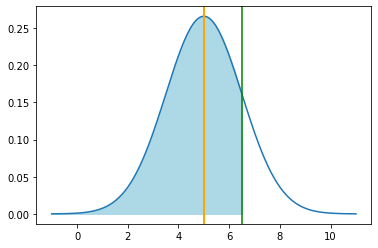

In [10]:
# Left tail probability plot

# X-values
dist_x = np.linspace(m - 4 * s, m + 4 * s, num=201)
# Y-values for drawing the Gauss curve
dist_y = stats.norm.pdf(dist_x, m, s)
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)
# Fill the area left of x
plt.fill_between(dist_x, 0, dist_y, where=dist_x <= x, color='lightblue')
# Show the mean with an orange line
plt.axvline(m, color="orange", lw=2)
# Show x with a green line
plt.axvline(x, color="green")

The left tail probability is the dark blue area in this plot.

### More examples of probability calculations

What is the probability of observing Superman's reaction speed to be:

1. less than 4 ms?
2. more than 7 ms?
3. less than 3 ms?
4. between 2 and 6.5 ms?

In [11]:
print("1. P(X < 4) ~= %.3f" % stats.norm.cdf(4, loc=m, scale=s))
print("2. P(X > 7) ~= %.3f" % stats.norm.sf(7, loc=m, scale=s))
print("3. P(X < 3) ~= %.3f" % stats.norm.cdf(3, loc=m, scale=s))
print("4. P(2 < X < 6.5) ~= %.3f" % (stats.norm.cdf(6.5, loc=m, scale=s) - 
                                  stats.norm.cdf(2, loc=m, scale=s)))

1. P(X < 4) ~= 0.252
2. P(X > 7) ~= 0.091
3. P(X < 3) ~= 0.091
4. P(2 < X < 6.5) ~= 0.819


Another type of question: under what value will 80% of observations be?

To calculate this we would need the inverse function of `cdf()`. However, it does not exist in SciPy. We do have the inverse function of `sf()`, though, which is called `isf()`. We can find the result by calculating the reaction time above which 20% of the values lie, which amounts to the same:

In [12]:
print("P(X < %.4f) ≃ 0.8" % stats.norm.isf((1-.8), loc=m, scale=s))

P(X < 6.2624) ≃ 0.8


## Confidence intervals

A confidence interval is an estimate in the form of an area within which you expect the unknown population mean to be with a certain level of confidence.

Let's say we have *n* = 100 observations of Superman's reaction speed and we get a sample mean of 5.2 ms. We assume that we know the actual standard deviation of his reaction speed and that it is 1.5 ms.

To determine a confidence interval, we proceed as follows:

1. We take the sample mean as an initial estimate and choose a confidence level, eg $1 - \alpha = 0.95$ (or 95%).
2. We then find the $z$ score between which 95% of all values lie with a standard normal distribution.
3. We use this to determine the values to the left and right of the sample mean between which we expect 95% of the values to fall for the probability distribution that we get from the *central limit theorem*.

In [13]:
# Step 1.
m = 5.2      # Sample mean
s = 1.5      # Population standard deviation
n = 100      # Sample size
alpha = .05  # 1 - alpha is the confidence level

# Step 2.
z = stats.norm.isf(alpha/2)
print("z-score: %.5f" % z)

# Step 3.
lo = m - z * s / np.sqrt(n)
hi = m + z * s / np.sqrt(n)
print("Confidence interval: [%.4f, %.4f]" % (lo, hi))

z-score: 1.95996
Confidence interval: [4.9060, 5.4940]


We conclude with a confidence level of 95% that Superman's reaction speed is somewhere between 4.91 and 5.49 ms.

## Confidence intervals for small samples

When we have a small sample ($n < 30$), the assumption we made in the central limit theorem no longer holds. In that case we cannot use the normal distribution.

However, there is still a way to construct a confidence interval via the so-called Student-$t$ distribution. This distribution resembles the normal distribution in that the probability density function looks like a Gauss curve. However, the Student-$t$ distribution also takes the sample size $n$ into account, so you must specify it. The density function gets an extra parameter called the number of *degrees of freedom* (abbreviated `df` of `dof`) and is equal to $n - 1$.

The smaller the degrees of freedom, the "flatter" the curve and the wider the confidence intervals obtained will be. This represents the greater uncertainty we get because of the small sample size. The larger sample size $n$ is, the closer the curve will approach that of the normal distribution.

In the graph below you will find the density function for the Student-$t$ distribution for different degrees of freedom:

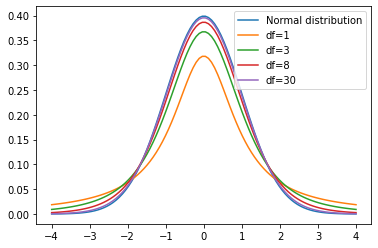

In [14]:
x = np.linspace(-4, +4, num=100)
fig, tplot = plt.subplots(1, 1)
tplot.plot(x, stats.norm.pdf(x, 0, 1), label="Normal distribution")
tplot.plot(x, stats.t.pdf(x, 1), label="df=1") 
tplot.plot(x, stats.t.pdf(x, 3), label="df=3")
tplot.plot(x, stats.t.pdf(x, 8), label="df=8")
tplot.plot(x, stats.t.pdf(x, 30), label="df=30")
tplot.legend(loc='best')

To illustrate this, we repeat the earlier example , but assume that the sample size was only 15.

In [15]:
# Step 1.
m = 5.2      # Sample mean
s = 1.5      # Population standard deviation
n = 15       # Sample size
alpha = .05  # 1 - alpha is the confidence level

# Stap 2.
t = stats.t.isf(alpha/2, df = n - 1)
print("t-score: %.5f" % t)

# Stap 3.
lo = m - t * s / np.sqrt(n)
hi = m + t * s / np.sqrt(n)
print("Confidence interval: [%.4f, %.4f]" % (lo, hi))

t-score: 2.14479
Confidence interval: [4.3693, 6.0307]


So we state with a confidence level of 95% that the reaction speed of the superheroes is between 4.37 and 6.03 ms.

This interval is considerably wider than what we obtained with a larger sample. So we are less certain of the position of the population mean.